In [122]:
##############################################
#Explorative Data Analysis of Baserun results#
#Maintainer: Christopher Chan                #
#Date: 2022-05-18                            #
#Version: 0.0.2                              #
##############################################

import os, sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Base_path = os.path.abspath("/home/chris/Dropbox/HOTOSM/HOTOSM_OAM_codeV2")
figure_path = os.path.join(Base_path, "figure")
BR_KBYpath = os.path.join(Base_path, "iter_log", "BASE_15cmKBY")
BR_ALLpath = os.path.join(Base_path, "iter_log", "BASE_15cmALL")

In [123]:
# Load the csv

KBY_4Unet_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_Four-Unet_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_057458.pth.csv"))
KBY_IMN_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_EB1-Unet-IMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_064618.pth.csv"))
KBY_qubvel_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_EB1-Unet-qubvel_lr1e-3_wd1e-5_b16_ep500_BCE_RLRonPlateau(min1e-8)_iter_082697.pth.csv"))
KBY_NoIMN_csv = pd.read_csv(os.path.join(BR_KBYpath, "KBY5719:1224_256oc_EB1-Unet-NoIMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_023448.pth.csv"))

ALL_4Unet_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_Four-Unet_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_280360.pth.csv"))
ALL_IMN_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_EB1-Unet-IMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_223260.pth.csv"))
ALL_qubvel_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_EB1-Unet-qubvel_lr1e-3_wd1e-5_b16_ep500_BCE_RLRonPlateau(min1e-8)_iter_548820.pth.csv"))
ALL_NoIMN_csv = pd.read_csv(os.path.join(BR_ALLpath, "18242:3909_256oc_EB1-Unet-NoIMN_lr1e-3_wd1e-5_b32_ep500_BCE_RLRonPlateau(min1e-8)_iter_160450.pth.csv"))


In [124]:
print(ALL_4Unet_csv.describe())

       Unnamed: 0          id  Dice_score  True_Positive  True_Negative  \
count  435.000000  435.000000  421.000000     435.000000     435.000000   
mean   217.000000  217.000000    0.857208   13398.666667   48174.618391   
std    125.717938  125.717938    0.131083   12300.234185   15726.725363   
min      0.000000    0.000000    0.003350       0.000000    8601.000000   
25%    108.500000  108.500000    0.828502    3235.500000   33152.000000   
50%    217.000000  217.000000    0.890331    8311.000000   54955.000000   
75%    325.500000  325.500000    0.933914   23858.000000   61356.000000   
max    434.000000  434.000000    0.990355   47277.000000   65536.000000   

       False_Negative  False_Positive   Precision      Recall  Specificity  \
count      435.000000      435.000000  427.000000  434.000000   435.000000   
mean       836.450575     3126.264368    0.800976    0.902437     0.916063   
std       1291.899912     3488.221438    0.186636    0.189060     0.108311   
min         

In [125]:
# Function to calculate global statistics for local_vs_globalSUM.csv

def GLOBclass_metrics(csv):
    TP_SUM = np.sum(csv["True_Positive"])
    TN_SUM = np.sum(csv["True_Negative"])
    FP_SUM = np.sum(csv["False_Positive"])
    FN_SUM = np.sum(csv["False_Negative"])

    # 2nd order statistics
    Precision = (TP_SUM / (TP_SUM + FP_SUM))
    Recall = (TP_SUM / (TP_SUM + FN_SUM)) #True Positive Rate / Sensitivity
    Specificity = (TN_SUM / (FP_SUM + TN_SUM)) #True Negative Rate
    OA = ((TP_SUM + TN_SUM) / (TP_SUM + TN_SUM + FP_SUM + FN_SUM))
    IoU = (TP_SUM / (TP_SUM + FN_SUM + FP_SUM))
    Dice = (2 * ((Precision * Recall) / (Precision + Recall)))

    return print("GLOBAL: Precision = {0}, Recall = {1}, Specificity = {2}, Overall Accuracy = {3}, Intersection-over-Union = {4}, Dice-Score = {5}".format(Precision, Recall, Specificity, OA, IoU, Dice))


In [126]:
GLOBclass_metrics(ALL_NoIMN_csv)

GLOBAL: Precision = 0.7784909710255873, Recall = 0.9168762826463162, Specificity = 0.9276089622978861, Overall Accuracy = 0.9252777099609375, Intersection-over-Union = 0.7271690190741349, Dice-Score = 0.8420357371439428


In [141]:
# Transform and plotting of mean window vs global statistics

WIN_vs_GLOB_csv = pd.read_csv(os.path.join(Base_path, "minWIN_vs_GlobalSUM2.csv"))

WIN_vs_GLOB_csv

Experiment  mean_Precision  mean_Recall(TPR)  \
0              winKBY_4Unet        0.846848          0.883820   
1       winKBY_EB1-Unet-IMN        0.835588          0.888912   
2    winKBY_EB1-Unet-qubvel        0.842267          0.894135   
3     winKBY_EB1-Unet-NoIMN        0.844003          0.878586   
4             globKBY_4Unet        0.876089          0.957042   
5      globKBY_EB1-Unet-IMN        0.906424          0.968574   
6   globKBY_EB1-Unet-qubvel        0.905570          0.974020   
7    globKBY_EB1-Unet-NoIMN        0.902977          0.960412   
8              winALL_4Unet        0.800976          0.902437   
9       winALL_EB1-Unet-IMN        0.762916          0.898346   
10   winALL_EB1-Unet-qubvel        0.760016          0.897031   
11    winALL_EB1-Unet-NoIMN        0.811898          0.880570   
12            globALL_4Unet        0.810815          0.941240   
13     globALL_EB1-Unet-IMN        0.787711          0.936536   
14  globALL_EB1-Unet-qubvel        0.780991          0.930698   
15   globALL_EB1-Unet-NoIMN        0.778491          0.916876   

    mean_Specificity(TNR)   mean_OA  mean_Dice  mean_IoU  
0                0.987618  0.985646   0.883683  0.768572  
1                0.990790  0.989421   0.885394  0.792987  
2                0.990570  0.989733   0.892346  0.799393  
3                0.990536  0.988506   0.887019  0.783649  
4                0.988150  0.985646   0.914778  0.842941  
5                0.991246  0.989421   0.936469  0.880528  
6                0.991108  0.989733   0.938549  0.884213  
7                0.990966  0.988506   0.930810  0.870574  
8                0.916063  0.939534   0.857208  0.745171  
9                0.904668  0.931392   0.829716  0.718724  
10               0.901228  0.928257   0.828467  0.714154  
11               0.904043  0.925278   0.811898  0.699717  
12               0.939060  0.939534   0.871173  0.771751  
13               0.929964  0.931392   0.855701  0.747795  
14               0.927580  0.928257   0.849298  0.738069  
15               0.927609  0.925278   0.842036  0.727169

In [128]:
print(WIN_vs_GLOB_csv.iloc[0:8, 0])

0               winKBY_4Unet
1        winKBY_EB1-Unet-IMN
2     winKBY_EB1-Unet-qubvel
3      winKBY_EB1-Unet-NoIMN
4              globKBY_4Unet
5       globKBY_EB1-Unet-IMN
6    globKBY_EB1-Unet-qubvel
7     globKBY_EB1-Unet-NoIMN
Name: Experiment, dtype: object


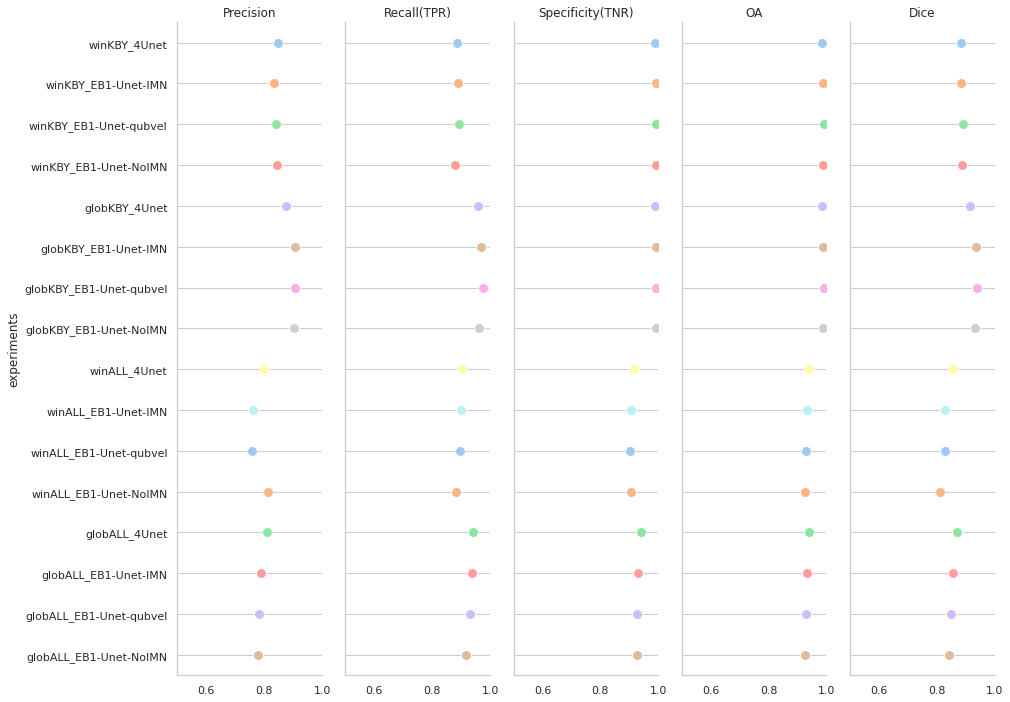

In [129]:
sns.set_theme(style="whitegrid")

strip = sns.PairGrid(WIN_vs_GLOB_csv,
                 x_vars = WIN_vs_GLOB_csv.iloc[0:8, 1:6], y_vars = ["Experiment"][0:8],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
strip.map(sns.stripplot, size = 10, orient = "h", jitter = False,
      palette = "pastel", linewidth = 1, edgecolor = "white")

# Use the same x axis limits on all columns and add better labels
strip.set(xlim = (0.5, 1), xlabel = "", ylabel = "experiments")

# Use semantically meaningful titles for the columns
titles = ["Precision", "Recall(TPR)", "Specificity(TNR)", "OA", 
          "Dice", "IoU"]

for ax, title in zip(strip.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)


## 4-Layer U-Net KBY vs ALL (per Window)

In [165]:
# Prepare pd.DataFrame for KBY vs ALL
KBYALL_4Unet_merge = pd.DataFrame(pd.merge(KBY_4Unet_csv, ALL_4Unet_csv, how = "left", 
                                          on = "png", suffixes = ("_KBY", "_ALL")))
KBYALL_4Unet_merge = KBYALL_4Unet_merge.drop(["Unnamed: 0_KBY", "Unnamed: 0_ALL"], axis = 1)

print(KBYALL_4Unet_merge.describe())

           id_KBY  Dice_score_KBY  True_Positive_KBY  True_Negative_KBY  \
count  136.000000      129.000000         136.000000         136.000000   
mean    67.500000        0.883683        5048.911765       59546.360294   
std     39.403892        0.129027        4537.017966        5090.281038   
min      0.000000        0.285714           0.000000       40791.000000   
25%     33.750000        0.887550        1720.000000       57245.750000   
50%     67.500000        0.930668        4074.000000       60813.500000   
75%    101.250000        0.949469        6911.250000       63463.500000   
max    135.000000        0.985367       21949.000000       65534.000000   

       False_Negative_KBY  False_Positive_KBY  Precision_KBY  Recall_KBY  \
count          136.000000          136.000000     132.000000  136.000000   
mean           226.625000          714.102941       0.846848    0.883820   
std            462.852907          853.514584       0.188328    0.240933   
min              1.0

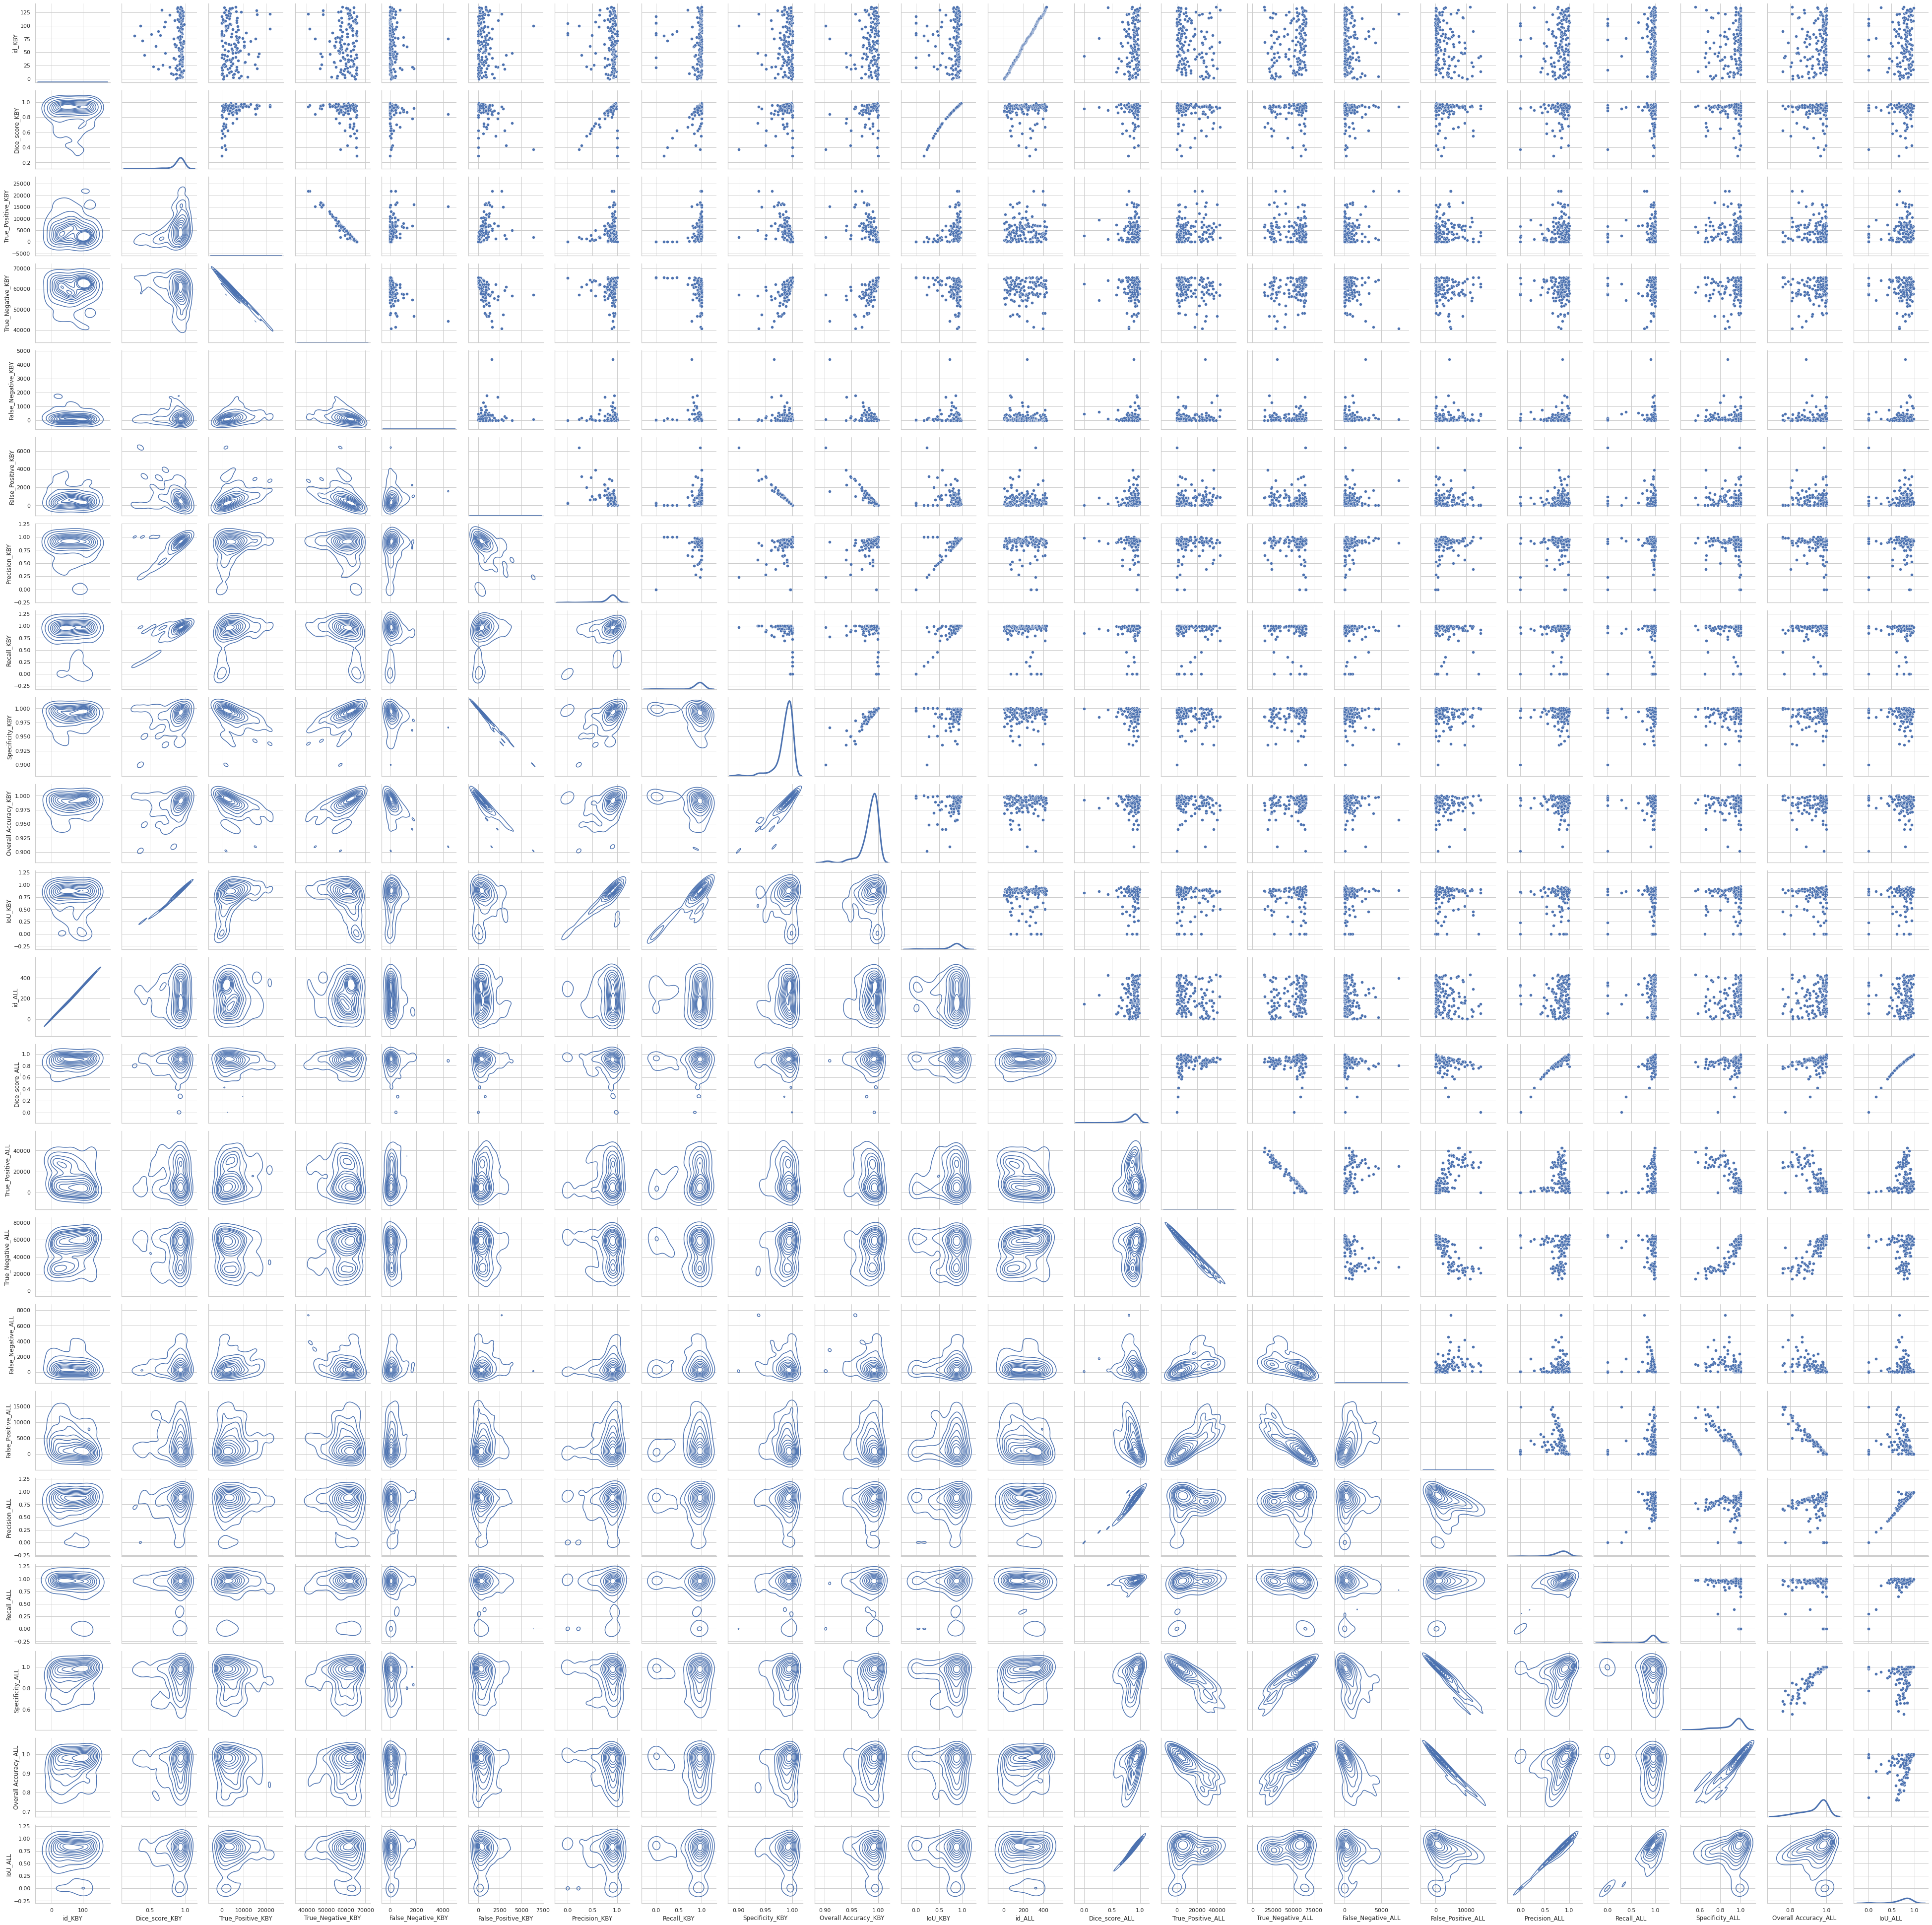

In [170]:
# Violin Pairgrid for metrics between per window statistics
g = sns.PairGrid(KBYALL_4Unet_merge, palette = "flare_r")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 3, legend = True)